In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

df_admissions = pd.read_csv('patient_admissions_details.csv')
df_admissions.head()

,patient_id,name,gender,blood_type,admission_date,discharge_date,diagnosis,doctor_name,specialization,num_lab_tests
0,1,Allison Hill,Male,A+,2023-03-07,2025-01-21,Anemia,Lisa Johnson,Neurology,6
1,1,Allison Hill,Male,A+,2024-05-16,2023-06-15,Covid-19,Max Diaz,Neurology,6
2,1,Allison Hill,Male,A+,2024-08-10,2024-09-26,Diabetes,Tiffany Calderon,Oncology,6
3,2,Alyssa Gonzalez,Female,B-,2023-10-14,2023-04-13,Diabetes,William Newman,General Medicine,6
4,2,Alyssa Gonzalez,Female,B-,2023-11-22,2024-01-05,Diabetes,Roger Morris,Neurology,6


In [16]:
df_admissions.shape

(2076, 11)

In [6]:
df_admissions['admission_date'] = pd.to_datetime(df_admissions['admission_date'])
df_admissions['discharge_date'] = pd.to_datetime(df_admissions['discharge_date'])

In [7]:
# 1. Calculate length of stay
df_admissions['length_of_stay'] = (df_admissions['discharge_date'] - df_admissions['admission_date']).dt.days
df_admissions.head()

,patient_id,name,gender,blood_type,admission_date,discharge_date,diagnosis,doctor_name,specialization,num_lab_tests,length_of_stay
0,1,Allison Hill,Male,A+,2023-03-07,2025-01-21,Anemia,Lisa Johnson,Neurology,6,686
1,1,Allison Hill,Male,A+,2024-05-16,2023-06-15,Covid-19,Max Diaz,Neurology,6,-336
2,1,Allison Hill,Male,A+,2024-08-10,2024-09-26,Diabetes,Tiffany Calderon,Oncology,6,47
3,2,Alyssa Gonzalez,Female,B-,2023-10-14,2023-04-13,Diabetes,William Newman,General Medicine,6,-184
4,2,Alyssa Gonzalez,Female,B-,2023-11-22,2024-01-05,Diabetes,Roger Morris,Neurology,6,44


In [17]:
# Identify invalid records
invalid_records = df_admissions[df_admissions['length_of_stay'] < 0]
print(f"Found {len(invalid_records)} invalid records with negative stay.")

Found 674 invalid records with negative stay.


In [ ]:
clean_df = df_admissions[df_admissions['length_of_stay'] >= 0].copy()

In [ ]:
# Strategy 1: Assume swapped dates and correct
df_admissions.loc[df_admissions['length_of_stay'] < 0, ['admission_date', 'discharge_date']] = \
    df_admissions.loc[df_admissions['length_of_stay'] < 0, ['discharge_date', 'admission_date']].values

In [ ]:
# Strategy 2: Set to minimum stay (e.g., 1 day) if logical
df_admissions.loc[df_admissions['length_of_stay'] < 0, 'length_of_stay'] = 1

In [ ]:
import numpy as np

# Add a flag for data quality
df_admissions['data_quality_flag'] = np.where(df_admissions['length_of_stay'] < 0, 'Invalid dates - needs review', 'Valid')

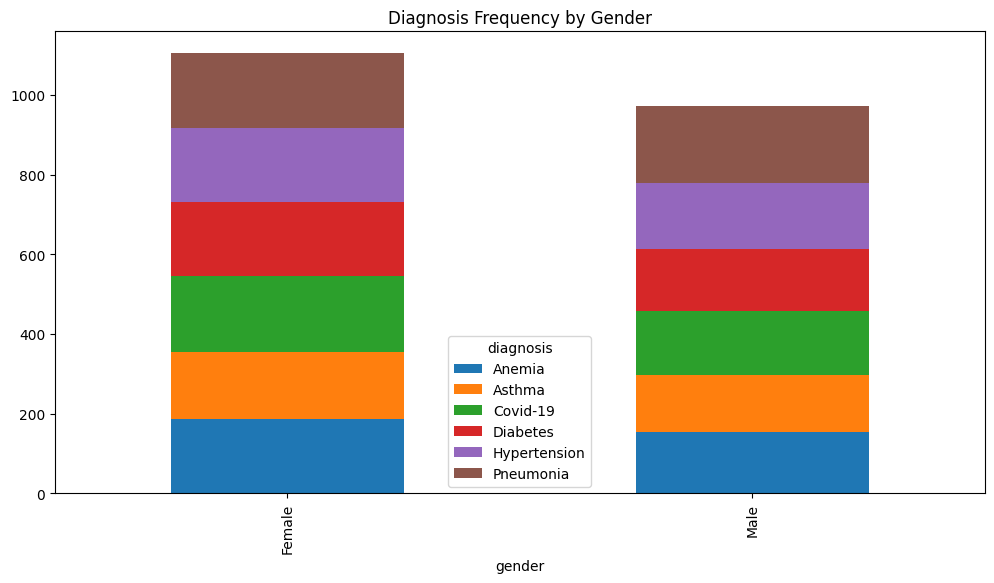

In [8]:
# 2. Top diagnoses by gender
top_diagnoses = df_admissions.groupby(['gender', 'diagnosis']).size().unstack().fillna(0)
top_diagnoses.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Diagnosis Frequency by Gender')
plt.show()

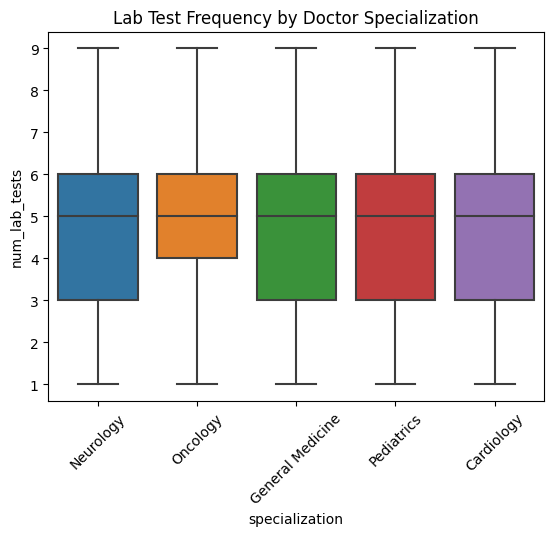

In [9]:
# 3. Lab tests vs. doctor specialization
sns.boxplot(data=df_admissions, x='specialization', y='num_lab_tests')
plt.xticks(rotation=45)
plt.title('Lab Test Frequency by Doctor Specialization')
plt.show()

In [10]:
df_prevalence = pd.read_csv('disease_prevalence_by_age_gender.csv')
df_prevalence.head()

,diagnosis,gender,age_group,prevalence_count
0,Anemia,Female,0-18,26
1,Anemia,Male,0-18,29
2,Anemia,Female,19-35,33
3,Anemia,Male,19-35,21
4,Anemia,Female,36-50,28


In [11]:
pivot_table = df_prevalence.pivot_table(
    index='diagnosis', 
    columns='age_group', 
    values='prevalence_count', 
    aggfunc='sum'
)

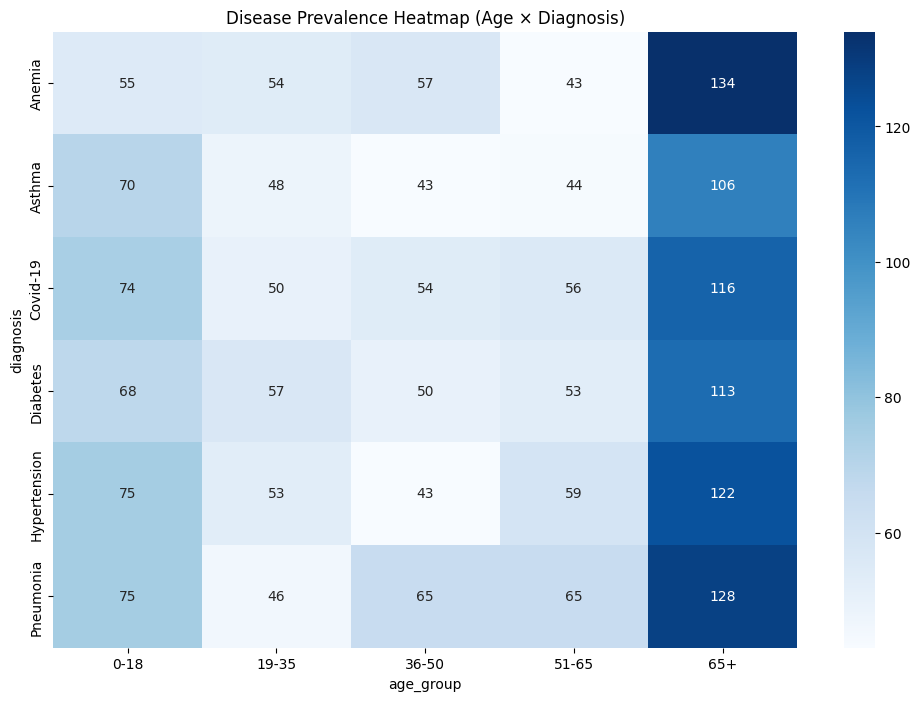

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='Blues')
plt.title('Disease Prevalence Heatmap (Age × Diagnosis)')
plt.show()

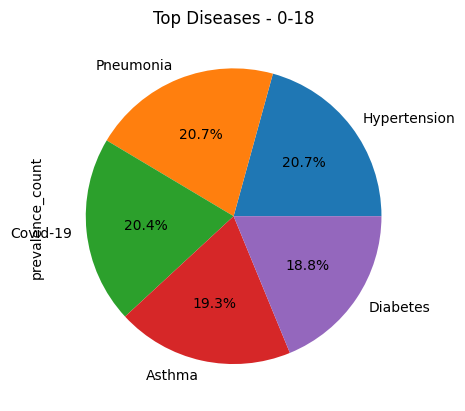

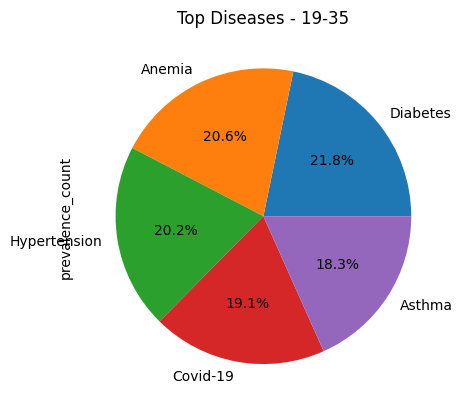

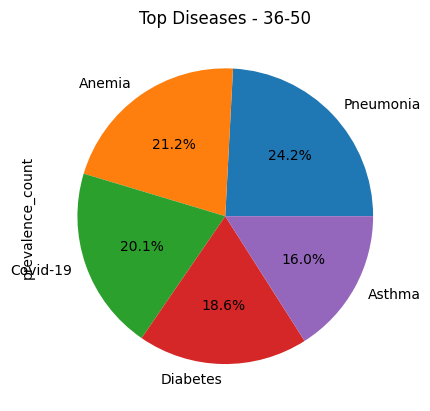

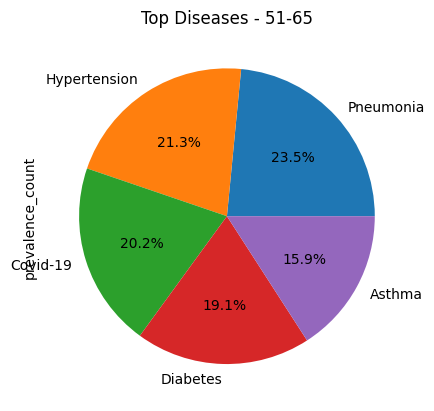

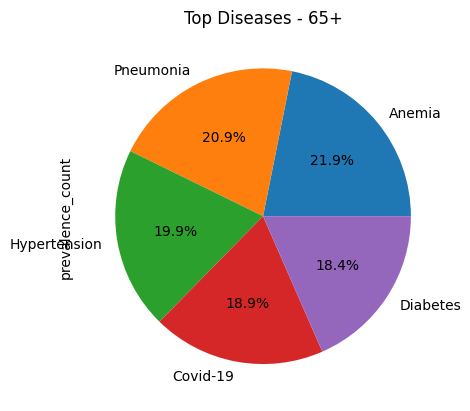

In [13]:
# 2. Top diseases for each age group
for age_group in df_prevalence['age_group'].unique():
    subset = df_prevalence[df_prevalence['age_group'] == age_group]
    top_diseases = subset.groupby('diagnosis')['prevalence_count'].sum().nlargest(5)
    top_diseases.plot(kind='pie', autopct='%1.1f%%', title=f'Top Diseases - {age_group}')
    plt.show()